<a href="https://colab.research.google.com/github/Jacklinekiarie/CNN/blob/main/cat_and_dog_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all libraries

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


dataset provided batchsize and epoch. 

In [4]:
# Get project files
#!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

#!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

Create an image generator. get the image used in testing and validation and testing. 

In [5]:

train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0 / 255)
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0 / 255)
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0 / 255)
train_data_gen = train_image_generator.flow_from_directory(directory = train_dir,
                                                           batch_size = batch_size,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode = "binary")
val_data_gen = validation_image_generator.flow_from_directory(directory = validation_dir,
                                                              batch_size = batch_size,
                                                              target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode = "binary")
test_data_gen = test_image_generator.flow_from_directory(directory = PATH,
                                                         batch_size = batch_size,
                                                         target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                         shuffle = False,
                                                         classes=['test'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


Visualize the given images which is dog and cat in this case. 

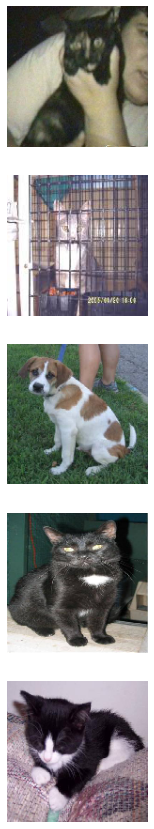

In [6]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Increase the number of images by rescaling, rotation zoom the image flip the image . Inorder to increase the accuracy.This reduces overfitting .Rescale is between 0 and 255 to values between 0 and 1

In [7]:

train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0 / 255,
                                                                        rotation_range=40,
                                                                        zoom_range=0.25,
                                                                        width_shift_range=0.25,
                                                                        height_shift_range=0.25,
                                                                        horizontal_flip=True,
                                                                        fill_mode='nearest')



Plot the new image generated . The out put contain 5 images different scale lighting and position . this help the model to see that image in differnt angles.

Found 2000 images belonging to 2 classes.


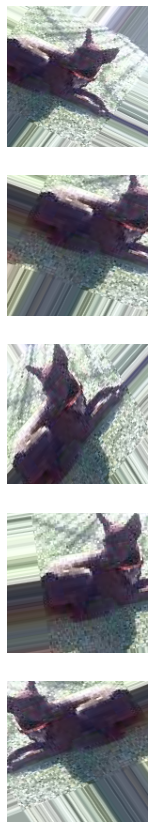

In [8]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

Creating CNN model . It contains 3 layers. In the Input layer the conv2D has 32 filters and pixel 3x3 . Imagesize will be 200,200(imagewidht) and (imageheight).
maxpooling shink the image into 2x2 dimension and usually 2 stride.
walks accross the filtered image and takes the maximum number.
Relu activation(it is a non linear function)it outputs if it is its positive and the negative number are changed to zero.
Fully stacked cnn

dense layer has 128 neuron and out put in 1 neuron.

In [9]:
from tensorflow.keras import datasets, layers, models

model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam',
               loss='binary_crossentropy',
              metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 73984)             0

Train our Model

In [10]:
history = model.fit(x=train_data_gen, steps_per_epoch=15, epochs=epochs, validation_data=val_data_gen, validation_steps=8, verbose=1)

Epoch 1/15
15/15 [==============================] - 100s 6s/step - loss: 0.7822 - accuracy: 0.5059 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 2/15
15/15 [==============================] - 96s 6s/step - loss: 0.6840 - accuracy: 0.5208 - val_loss: 0.7047 - val_accuracy: 0.5150
Epoch 3/15
15/15 [==============================] - 96s 6s/step - loss: 0.6703 - accuracy: 0.5636 - val_loss: 0.6519 - val_accuracy: 0.6080
Epoch 4/15
15/15 [==============================] - 96s 6s/step - loss: 0.6493 - accuracy: 0.6058 - val_loss: 0.6261 - val_accuracy: 0.6650
Epoch 5/15
15/15 [==============================] - 104s 7s/step - loss: 0.6450 - accuracy: 0.6229 - val_loss: 0.6477 - val_accuracy: 0.5810
Epoch 6/15
15/15 [==============================] - 108s 7s/step - loss: 0.6269 - accuracy: 0.6335 - val_loss: 0.6254 - val_accuracy: 0.6580
Epoch 7/15
15/15 [==============================] - 97s 6s/step - loss: 0.6413 - accuracy: 0.6474 - val_loss: 0.6214 - val_accuracy: 0.6550
Epoch 8/15
15/15 

Visualize our output using graphs to get the  accuracy and loss of the model.

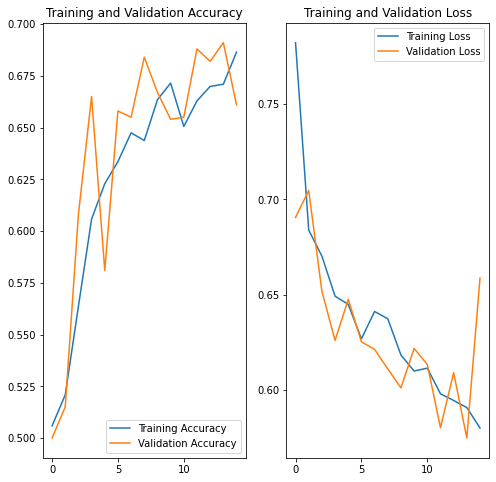

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We predict the image if it is a cat or a dog.

In [12]:


array_probabilities = model.predict(test_data_gen)
probabilities = [i[0] for i in array_probabilities]

#test_images, _ = next(test_data_gen)
#probabilities = (model.predict(test_data_gen) >  0.5).astype("int32")
#plotImages(test_images, probabilities=probabilities)

Acurracy should atleast be 63% after training the model.

In [13]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 66.0% of the images of cats and dogs.
You passed the challenge!
